In [1]:
import BFast
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 13})

!nvidia-smi --query-gpu=gpu_name --format=csv,noheader

NVIDIA A100-PCIE-40GB
NVIDIA A100-PCIE-40GB


In [2]:
BoxSize = 1000.
kF = 2*np.pi/BoxSize
grid = 256

In [3]:
df = np.load(f"df_m_256_PCS_z=0.npy")

In [4]:
help(BFast.Bk_fast)

Help on function Bk_fast in module BFast.BFast:

Bk_fast(delta, BoxSize, fc, dk, Nbins, triangle_type='All', MAS=None, verbose=False)
    Computes binned bispectrum of field for given binning and triangles
    
    Parameters:
    -----------
    fc: float
        Center of first bin in units of the fundamental mode.
    dk: float
        Width of the bin in units of the fundamental mode.
    Nbins: int
        Total number of momentum bins such that bins are given by kf*[(fc + i)±dk/2 for i in range(Nbins)].
    triangle_type: str, optional (default='All')
        Type of triangles to include in the bispectrum calculation. 
        Options: 'All' (include all shapes of triangles),
                 'Squeezed' (only triangles k_1 > k_2 = k_3), 
                 'Equilateral' (include only triangles k_1 = k_2 = k_3).
    MAS: str, optional (default=None)
        Mass Assignment Scheme to compensate for (options are NGP,CIC,TSC,PCS)
    verbose: bool, optional (default=False)
        If T

In [5]:
%time Bks_fast = BFast.Bk_fast(df,BoxSize,3.,3.,27,'All','PCS',verbose=True)

No counts file found, computing this first!
Considering 2276 Triangle Configurations (All)
Saved Triangle Counts to BFast_BkCounts_LBox1000.00_Grid256_Binning3.00kF_fc3.00_NBins27_TriangleTypeAll.npy
CPU times: user 5.98 s, sys: 2.12 s, total: 8.11 s
Wall time: 16.1 s


## The first time jax compiles certain parts, a next call is blazing fast:

In [6]:
%time Bks_fast = BFast.Bk_fast(df,BoxSize,3.,3.,27,'All','PCS',verbose=True)

Loading Counts from BFast_BkCounts_LBox1000.00_Grid256_Binning3.00kF_fc3.00_NBins27_TriangleTypeAll.npy
Considering 2276 Triangle Configurations (All)
CPU times: user 750 ms, sys: 209 ms, total: 958 ms
Wall time: 854 ms


## There is also a slower but more memory friendly algorithm for larger boxes

In [8]:
%time Bks = BFast.Bk(df,BoxSize,3.,3.,27,'All','PCS',verbose=True)

Loading Counts from BFast_BkCounts_LBox1000.00_Grid256_Binning3.00kF_fc3.00_NBins27_TriangleTypeAll.npy
Considering 2276 Triangle Configurations (All)


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/2276 [00:00<?, ?it/s]

CPU times: user 5.61 s, sys: 54.9 ms, total: 5.66 s
Wall time: 5.77 s


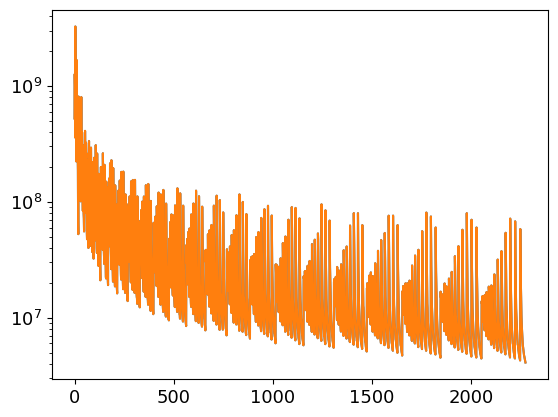

In [9]:
plt.semilogy(Bks_fast[:,-2])
plt.semilogy(Bks[:,-2])

## There is also a power spectrum method with a binning of kF

CPU times: user 286 ms, sys: 87.7 ms, total: 374 ms
Wall time: 347 ms


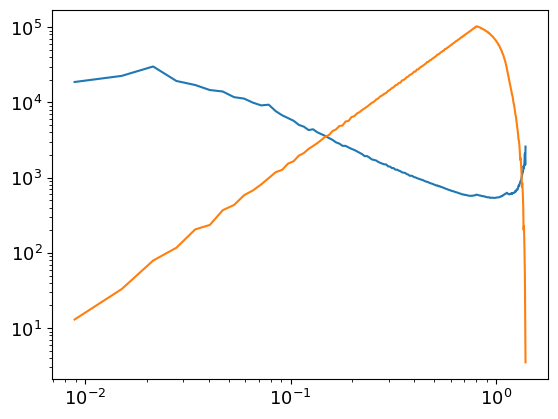

In [13]:
%time Pks = BFast.Pk(df,1000.,MAS='PCS')

plt.loglog(Pks[:,0],Pks[:,1])
plt.loglog(Pks[:,0],Pks[:,2]) #these are the number of pairs in a bin